In [1]:
import tweepy 
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [2]:
APIkey="B16kPjQMBn3BBnaG8R059c9vD"
APISecreatKey="lyfxmBnBldfbvz0p41ocob9eQXgUYaBEwUg6Ly4Lg4HAjZ22eP" 
accessToken="2495913812-OyWmtsrE93xmHPM7KqlRLpHkycYRraBzyha1fgS"
accessTokenSecreat="yvINqWAOpGObgT9rZNUrQf8b03D4G0AS5dlQJjIApMsly" 

In [3]:
auth=tweepy.OAuthHandler(APIkey,APISecreatKey)

In [4]:
auth.set_access_token(accessToken,accessTokenSecreat)

In [5]:
api_connect=tweepy.API(auth)

In [6]:
posts=api_connect.search('Dogecoin',count=100,lang="en",tweet_mode='extended')

i=1
for tweet in posts[:10]:  
    print(str(i) + ') ' + tweet.full_text + '\n')
    i= i+1

1) @BillyM2k @davidgokhshtein Dear @BillyM2k , I'm Invest DOGECOIN $28K, Please get  any contract from @elonmusk 
#Doge4Tesla

2) RT @CoinMarketCap: Want to access financial instruments via DeFi?
Check out the Impossible V2 Swap! @impossiblefi

#CoinMarketCap #Crypto #…

3) RT @Lilmook4real: Trying to get @RichHomieQuan to pull up to #DogePalooza to perform "Connected" with me. 

#Dogecoin

4) RT @DiavoloMartin: So #question is  #wholetthedogsout #who #dogs I'm sure it's #ElonMusk @elonmusk haha :p what do you think guys? #doge @d…

5) @AltcoinDailyio Go for $KISHU

2months old 
180K Holders
50K TG Members
Brand ambassador Ronaldinho &amp; Marcelo
Promoted at Tallest Building in the world, Burj Khalifa Dubai.

🖥 https://t.co/yRAtD3qjgH
📬 https://t.co/nPrNddl8BU

#kishuinu 
#KishuArmy
@InuKishu 
#dogecoin
#Ronaldinho
#Marcelo https://t.co/1ytOxsTHQW

6) RT @exg001: #dogecoin $doge #dogearmy @elonmusk 
https://t.co/RJ5lcMWdpM

7) RT @matiasdferrario: If you liked #DogeCoin you’ll LOVE @B

In [7]:
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head(10)

,Tweets
0,"@BillyM2k @davidgokhshtein Dear @BillyM2k , I'..."
1,RT @CoinMarketCap: Want to access financial in...
2,RT @Lilmook4real: Trying to get @RichHomieQuan...
3,RT @DiavoloMartin: So #question is #wholetthe...
4,@AltcoinDailyio Go for $KISHU\n\n2months old \...
5,RT @exg001: #dogecoin $doge #dogearmy @elonmus...
6,RT @matiasdferrario: If you liked #DogeCoin yo...
7,RT @ProTheDoge: Look guys - #dogecoin is going...
8,RT @CoinMarketCap: Work is Play and Play is Wo...
9,@IlhanMN Good afternoon everyone hodling #Doge...


In [8]:
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) 
    text= re.sub("#",'',text) 
    text=re.sub("[^-9A-Za-z ]", "" , text)
    text= re.sub('RT[\s]+','',text)
    text= re.sub('https?:\/\/\S+','',text) 
    return text

In [9]:
df['Tweets']= df['Tweets'].apply(cleanTxt)

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 100):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweets'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
  print(corpus)

[nltk_data] Downloading package stopwords to C:\Users\Anmol
[nltk_data]     Kala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dear im invest dogecoin k pleas get contract dogetesla']
['dear im invest dogecoin k pleas get contract dogetesla', 'want access financi instrument via deficheck imposs v swap coinmarketcap crypto']
['dear im invest dogecoin k pleas get contract dogetesla', 'want access financi instrument via deficheck imposs v swap coinmarketcap crypto', 'tri get pull dogepalooza perform connect dogecoin']
['dear im invest dogecoin k pleas get contract dogetesla', 'want access financi instrument via deficheck imposs v swap coinmarketcap crypto', 'tri get pull dogepalooza perform connect dogecoin', 'question wholetthedogsout dog im sure elonmusk haha p think guy doge']
['dear im invest dogecoin k pleas get contract dogetesla', 'want access financi instrument via deficheck imposs v swap coinmarketcap crypto', 'tri get pull dogepalooza perform connect dogecoin', 'question wholetthedogsout dog im sure elonmusk haha p think guy doge', 'go kishumonth old k holdersk tg membersbrand ambassador ronaldinho am

['dear im invest dogecoin k pleas get contract dogetesla', 'want access financi instrument via deficheck imposs v swap coinmarketcap crypto', 'tri get pull dogepalooza perform connect dogecoin', 'question wholetthedogsout dog im sure elonmusk haha p think guy doge', 'go kishumonth old k holdersk tg membersbrand ambassador ronaldinho amp marcelopromot tallest build world burj khalifa dubai httpstcoyratdqjgh httpstconprnddlbukishuinu kishuarmi dogecoinronaldinhomarcelo httpstcoytoxsthqw', 'dogecoin doge dogearmi httpstcorjlcmwdpm', 'like dogecoin youll love reward hold help savedog need httpst', 'look guy dogecoin go go dollar point blank period matter time point', 'work play play worklearn play earn work token coinmarketcap crypto cryptocur', 'good afternoon everyon hodl dogecoin', 'dogearmi alway support appreci doge dogecoin', 'dogearmi reach good friend mine special messag us thank sir takin', 'day ask like elong chariti cryptocurr pretti niceelong elongatechari', 'like dogecoin youl

KeyError: 90

In [11]:
df.head(20)

,Tweets
0,Dear Im Invest DOGECOIN K Please get any ...
1,Want to access financial instruments via DeFiC...
2,Trying to get to pull up to DogePalooza to pe...
3,So question is wholetthedogsout who dogs Im s...
4,Go for KISHUmonths old K HoldersK TG MembersB...
5,dogecoin doge dogearmy httpstcoRJlcMWdpM
6,If you liked DogeCoin youll LOVE It rewards yo...
7,Look guys - dogecoin is going to go to dollar...
8,Work is Play and Play is WorkLearn how to Play...
9,Good afternoon everyone hodling Dogecoin


In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

In [13]:
df

,Tweets,Subjectivity,Polarity
0,Dear Im Invest DOGECOIN K Please get any ...,0.000000,0.000000
1,Want to access financial instruments via DeFiC...,0.500000,-0.333333
2,Trying to get to pull up to DogePalooza to pe...,0.000000,0.000000
3,So question is wholetthedogsout who dogs Im s...,0.594444,0.350000
4,Go for KISHUmonths old K HoldersK TG MembersB...,0.200000,0.100000
...,...,...,...
85,if youre holding bitcoin or dogecoin,0.000000,0.000000
86,If you liked DogeCoin youll LOVE It rewards yo...,0.700000,0.550000
87,I started looking into cryptocurrencies when I...,0.152778,0.083333
88,Oh my days A Dogecoin Party cruise How I wish ...,0.000000,0.000000


In [14]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Dear Im Invest DOGECOIN K Please get any ...,0.000000,0.000000,Neutral
1,Want to access financial instruments via DeFiC...,0.500000,-0.333333,Negative
2,Trying to get to pull up to DogePalooza to pe...,0.000000,0.000000,Neutral
3,So question is wholetthedogsout who dogs Im s...,0.594444,0.350000,Positive
4,Go for KISHUmonths old K HoldersK TG MembersB...,0.200000,0.100000,Positive
...,...,...,...,...
85,if youre holding bitcoin or dogecoin,0.000000,0.000000,Neutral
86,If you liked DogeCoin youll LOVE It rewards yo...,0.700000,0.550000,Positive
87,I started looking into cryptocurrencies when I...,0.152778,0.083333,Positive
88,Oh my days A Dogecoin Party cruise How I wish ...,0.000000,0.000000,Neutral


In [15]:
df.drop('Subjectivity', inplace=True, axis=1)

In [16]:
df

,Tweets,Polarity,Analysis
0,Dear Im Invest DOGECOIN K Please get any ...,0.000000,Neutral
1,Want to access financial instruments via DeFiC...,-0.333333,Negative
2,Trying to get to pull up to DogePalooza to pe...,0.000000,Neutral
3,So question is wholetthedogsout who dogs Im s...,0.350000,Positive
4,Go for KISHUmonths old K HoldersK TG MembersB...,0.100000,Positive
...,...,...,...
85,if youre holding bitcoin or dogecoin,0.000000,Neutral
86,If you liked DogeCoin youll LOVE It rewards yo...,0.550000,Positive
87,I started looking into cryptocurrencies when I...,0.083333,Positive
88,Oh my days A Dogecoin Party cruise How I wish ...,0.000000,Neutral


In [17]:
df.drop('Polarity', inplace=True, axis=1)


In [18]:
df

,Tweets,Analysis
0,Dear Im Invest DOGECOIN K Please get any ...,Neutral
1,Want to access financial instruments via DeFiC...,Negative
2,Trying to get to pull up to DogePalooza to pe...,Neutral
3,So question is wholetthedogsout who dogs Im s...,Positive
4,Go for KISHUmonths old K HoldersK TG MembersB...,Positive
...,...,...
85,if youre holding bitcoin or dogecoin,Neutral
86,If you liked DogeCoin youll LOVE It rewards yo...,Positive
87,I started looking into cryptocurrencies when I...,Positive
88,Oh my days A Dogecoin Party cruise How I wish ...,Neutral


In [19]:
df['Analysis'].value_counts()

Neutral     46
Positive    42
Negative     2
Name: Analysis, dtype: int64

In [20]:
positive=df[df['Analysis']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/df.shape[0]*100

46.666666666666664% of positive tweets


In [21]:
negative=df[df['Analysis']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/df.shape[0]*100

2.2222222222222223% of negative tweets


In [22]:
neutral=df[df['Analysis']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of Neutral tweets")
neutral1=neutral.shape[0]/df.shape[0]*100

51.11111111111111% of Neutral tweets


In [23]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutral1]
colors=['yellowgreen', 'lightcoral', 'lightskyblue']


(-1.1291629758763917,
 1.1096605992866901,
 -1.1464090352650969,
 1.1115419985760078)

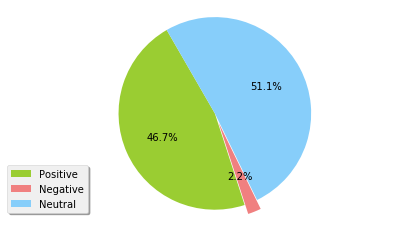

In [24]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')


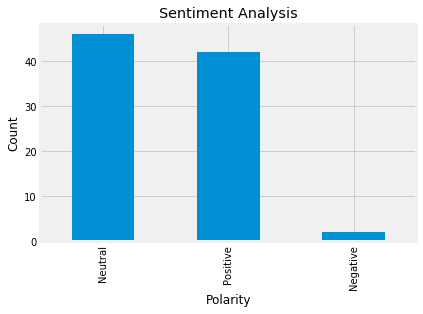

In [25]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
import numpy as np
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[['Neutral' 'Neutral']
 ['Positive' 'Positive']
 ['Positive' 'Neutral']
 ['Positive' 'Neutral']
 ['Neutral' 'Neutral']
 ['Positive' 'Positive']
 ['Positive' 'Positive']
 ['Positive' 'Positive']
 ['Positive' 'Negative']
 ['Neutral' 'Positive']
 ['Neutral' 'Neutral']
 ['Positive' 'Neutral']
 ['Positive' 'Positive']
 ['Neutral' 'Neutral']
 ['Neutral' 'Neutral']
 ['Neutral' 'Neutral']
 ['Neutral' 'Positive']
 ['Positive' 'Positive']]


In [30]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 1]
 [0 6 3]
 [0 2 6]]


0.6666666666666666